### **Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR

### **Downloading the Dataset**

In [8]:
telecom_data = pd.read_csv("C:/Users/Shahm/Downloads/league - Copy/iranian+churn+dataset/Customer Churn.csv")

In [10]:
telecom_data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [12]:
telecom_data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [14]:
telecom_data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [16]:
telecom_data.isnull().sum().sum()

0

### **Data Partitioning**

In [19]:
# splitting the data into train and test
X = telecom_data.drop(columns=["Customer Value"])
y = telecom_data["Customer Value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Data Scaling**

In [22]:
# using standard scaler to scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Data Table For Evaluation Metriics**

In [25]:
eval = pd.DataFrame(columns=['algorithm','r2_train','r2_test','rmse','mae'])

### **K-Nearest Neighbours Regressor (KNN)**

### Running the model on unscaled data

In [29]:
# fitting a k-nearest neighbor model
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [31]:
# getting prediction from knn
predictions = knn.predict(X_test)
predictions[:20]

array([9.17733333e+01, 0.00000000e+00, 1.59575000e+02, 7.80690000e+02,
       2.03880000e+02, 7.15166667e+01, 1.13906667e+02, 3.22720000e+02,
       9.49335000e+02, 1.94020000e+02, 1.02040000e+02, 4.29280000e+02,
       1.42965000e+03, 1.13235000e+02, 4.04400000e+01, 1.50000000e+00,
       3.16783333e+02, 1.89258667e+03, 2.60640000e+02, 1.15973333e+02])

In [33]:
# checking the first 20 rows of the prediction
np.isclose(predictions[:20], y_test[:20], atol=100)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [35]:
# checking the accuracy of the model
knn.score(X_test, y_test)

0.9785968112451232

### Running the model on scaled data

In [38]:
# fitting a k-nearest neighbor model
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [40]:
# getting prediction from knn
predictions = knn.predict(X_test_scaled)
predictions[:20]

array([8.98350000e+01, 1.71583333e+01, 1.54215000e+02, 7.55955000e+02,
       2.24430000e+02, 2.97300000e+01, 8.73333333e+01, 3.36093333e+02,
       9.19440000e+02, 1.36275000e+02, 9.78933333e+01, 3.69408333e+02,
       1.40539500e+03, 1.70173333e+02, 4.22400000e+01, 1.71000000e+00,
       2.67660000e+02, 1.88864000e+03, 3.32346667e+02, 1.81466667e+02])

In [42]:
# checking the first 20 rows of the prediction
np.isclose(predictions[:20], y_test[:20], atol=100)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [44]:
# checking the accuracy of the model
knn.score(X_test_scaled, y_test)

0.9938687984657574

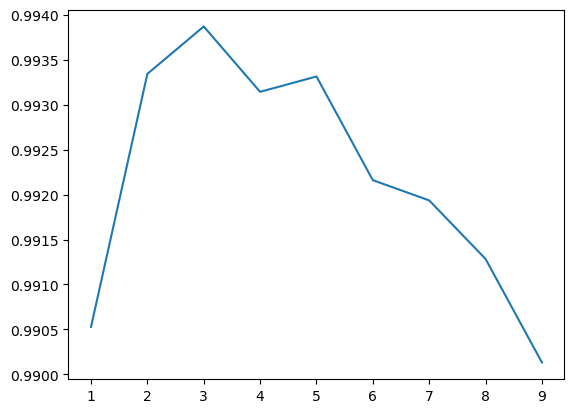

In [46]:
# running the model for different values of K

results = np.empty(9)   # marginally faster
# results = np.zeros(9)   # safer
for K in range(1,10):
  knn = KNeighborsRegressor(n_neighbors=K)
  knn.fit(X_train_scaled, y_train)
  results[K-1] = knn.score(X_test_scaled, y_test)
%matplotlib inline

plt.plot(np.arange(9)+1,results)

#### Model Selection and Evaluation

In [49]:
# selecting the best model

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(
knn.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test_scaled, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.994


In [51]:
# Evaluation metrics
print("R2 Score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))

R2 Score: 0.9938687984657574
Mean Absolute Error: 26.07993386243386
Root Mean Squared Error: 39.24769810777773


In [53]:
# populating the eval table
train_accuracy = knn.score(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)
rmse = np.sqrt(mean_squared_error(y_test, knn.predict(X_test_scaled)))
mae = mean_absolute_error(y_test, knn.predict(X_test_scaled))


results = ["K Nearest Neighbors",train_accuracy, test_accuracy, rmse, mae]
new_row = pd.DataFrame([results], columns=["algorithm","r2_train", "r2_test", "rmse", "mae"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

C:\Users\Shahm\AppData\Local\Temp\ipykernel_12968\3094904101.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval = pd.concat([eval, new_row], ignore_index=True)


,algorithm,r2_train,r2_test,rmse,mae
0,K Nearest Neighbors,0.996394,0.993869,39.247698,26.079934


### **Decision tree learning (DT)**

#### Running the model on unscaled data

In [57]:
# fitting a decision tree classifier
clf = DecisionTreeRegressor(criterion = "squared_error", random_state = 42)
clf = clf.fit(X_train, y_train)

In [59]:
# generating predictions for the test set
prediction = clf.predict(X_test)

In [61]:
# comparing the first 20 predictions with the actual values
np.isclose(predictions[:20], y_test[:20], atol=100)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [63]:
# getting the accuracy on the test set
clf.score(X_test, y_test)

0.9964271386297762

#### Running the model on scaled data

In [66]:
# fitting a decision tree classifier
clf = DecisionTreeRegressor(criterion = "squared_error", random_state = 42)
clf = clf.fit(X_train_scaled, y_train)

In [68]:
# generating predictions for the test set
prediction = clf.predict(X_test_scaled)

In [70]:
# comparing the first 20 predictions with the actual values
np.isclose(predictions[:20], y_test[:20], atol=100)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [72]:
# getting the accuracy on the test set
clf.score(X_test_scaled, y_test)

0.9967839196130509

#### Using a different parameter setting for the model

In [75]:
# using a different criterion for the decision tree

clf = DecisionTreeRegressor(criterion = 'absolute_error', random_state = 42)
clf = clf.fit(X_train_scaled, y_train)
prediction = clf.predict(X_test_scaled)
clf.score(X_test_scaled, y_test)

0.9957495394543644

#### Model Selection and Evaluation

In [78]:
# selecting the best model

clf = DecisionTreeRegressor(criterion = 'squared_error', random_state = 42)
clf.fit(X_train_scaled, y_train)
prediction = clf.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(
clf.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.997


In [80]:
# Evaluation metrics
print("R2 Score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))

R2 Score: 0.9967839196130509
Mean Absolute Error: 14.635126984126986
Root Mean Squared Error: 28.425285945986737


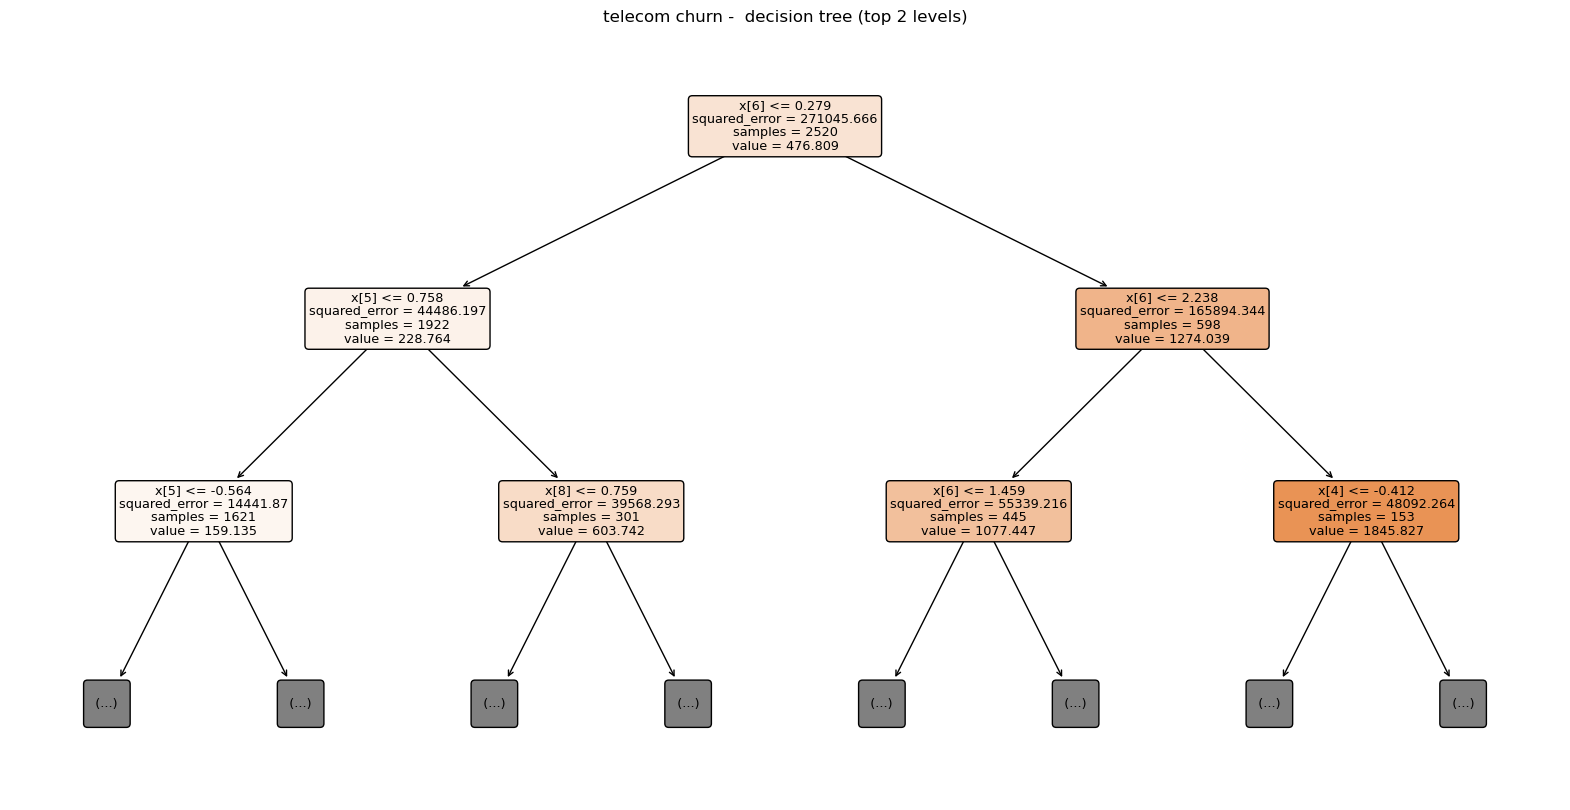

In [82]:
# Visualize top layers of the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, max_depth=2, filled=True, rounded=True)
plt.title("telecom churn -  decision tree (top 2 levels)")
plt.show()

In [84]:
# populating the eval table
train_accuracy = clf.score(X_train_scaled, y_train)
test_accuracy = clf.score(X_test_scaled, y_test)
rmse = np.sqrt(mean_squared_error(y_test, clf.predict(X_test_scaled)))
mae = mean_absolute_error(y_test, clf.predict(X_test_scaled))


results = ["Decision Tree Regressor",train_accuracy, test_accuracy, rmse, mae]
new_row = pd.DataFrame([results], columns=["algorithm","r2_train", "r2_test", "rmse", "mae"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,r2_train,r2_test,rmse,mae
0,K Nearest Neighbors,0.996394,0.993869,39.247698,26.079934
1,Decision Tree Regressor,1.000000,0.996784,28.425286,14.635127


### **Support Vector Machine (SVM)**

#### Running the model on unscaled data

In [87]:
# fitting a SVM
svm = LinearSVR()
svm.fit(X_train,y_train)

C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [89]:
# getting the predictions from the test data
prediction = svm.predict(X_test)

In [91]:
# comparing the first 20 predictions with the actual values
np.isclose(predictions[:20], y_test[:20], atol=100)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [93]:
# accuracy of the model
svm.score(X_test,y_test)

0.8326643069161799

#### Running the model on scaled data

In [96]:
# fitting a SVM
svm = LinearSVR()
svm.fit(X_train_scaled,y_train)

C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR()

In [98]:
# getting the predictions from the test data
prediction = svm.predict(X_test_scaled)

In [100]:
# comparing the first 20 predictions with the actual values
np.isclose(predictions[:20], y_test[:20], atol=100)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [102]:
# accuracy of the model
svm.score(X_test_scaled,y_test)

0.9741512284869956

#### Running the model on the different parameter setting

In [105]:
# using a differnet kernel setting
svm = SVR(kernel="rbf")
svm.fit(X_train_scaled,y_train)
prediction = svm.predict(X_test_scaled)
svm.score(X_test_scaled,y_test)

0.18496605620670892

#### Model Selection and Evaluation

In [108]:
# using the best model
svm =LinearSVR()
svm.fit(X_train_scaled, y_train)
prediction = svm.predict(X_test_scaled)
print("Accuracy on training set: {:.3f}".format(
svm.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test_scaled, y_test)))

Accuracy on training set: 0.981
Accuracy on test set: 0.974


C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [110]:
# Evaluation metrics
print("R2 Score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))

R2 Score: 0.9741797481854673
Mean Absolute Error: 35.46399645472408
Root Mean Squared Error: 80.54185561359387


In [112]:
# populating the eval table
train_accuracy = svm.score(X_train_scaled, y_train)
test_accuracy = svm.score(X_test_scaled, y_test)
rmse = np.sqrt(mean_squared_error(y_test, svm.predict(X_test_scaled)))
mae = mean_absolute_error(y_test, svm.predict(X_test_scaled))


results = ["Support Vector Machine",train_accuracy, test_accuracy, rmse, mae]
new_row = pd.DataFrame([results], columns=["algorithm","r2_train", "r2_test", "rmse", "mae"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,r2_train,r2_test,rmse,mae
0,K Nearest Neighbors,0.996394,0.993869,39.247698,26.079934
1,Decision Tree Regressor,1.000000,0.996784,28.425286,14.635127
2,Support Vector Machine,0.980556,0.974180,80.541856,35.463996


### **Neural networks (NN)**

#### Training the model on unscaled data

In [115]:
# fitting the multi layer perceptron model
mlp = MLPRegressor(random_state=42)
mlp = mlp.fit(X_train, y_train)

C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [117]:
# generate the predictions from the test set
prediction =  mlp.predict(X_test)

In [119]:
# comparing the first 20 predictions with the actual values
np.isclose(predictions[:20], y_test[:20], atol=100)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [121]:
# accuracy of the model on the test set
mlp.score(X_test, y_test)

0.98376074647812

#### Training the model on scaled data

In [124]:
# fitting the multi layer perceptron model
mlp = MLPRegressor(random_state=42)
mlp = mlp.fit(X_train_scaled, y_train)

C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [126]:
# generate the predictions from the test set
prediction =  mlp.predict(X_test_scaled)

In [128]:
# comparing the first 20 predictions with the actual values
np.isclose(predictions[:20], y_test[:20], atol=100)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [130]:
# accuracy of the model on the test set
mlp.score(X_test_scaled, y_test)

0.9693018546207053

#### Optimizing the parameters of the model

In [133]:
# increasing the number of hidden units in the MLP
mlp = MLPRegressor(hidden_layer_sizes=300,random_state=42)
mlp = mlp.fit(X_train, y_train)
prediction =  mlp.predict(X_test)
mlp.score(X_test, y_test)

C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9849506320669197

#### Model Selection and Evaluation

In [136]:
# selecting the best model
mlp = MLPRegressor(hidden_layer_sizes=300,random_state=42)
mlp.fit(X_train, y_train)
prediction =  mlp.predict(X_test)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.990
Accuracy on test set: 0.985


C:\Users\Shahm\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [138]:
# Evaluation metrics
print("R2 Score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))

R2 Score: 0.9849506320669197
Mean Absolute Error: 32.346445862204256
Root Mean Squared Error: 61.489438111148324


In [140]:
# populating the eval table
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, mlp.predict(X_test)))
mae = mean_absolute_error(y_test, mlp.predict(X_test))


results = ["Neural Network",train_accuracy, test_accuracy, rmse, mae]
new_row = pd.DataFrame([results], columns=["algorithm","r2_train", "r2_test", "rmse", "mae"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,r2_train,r2_test,rmse,mae
0,K Nearest Neighbors,0.996394,0.993869,39.247698,26.079934
1,Decision Tree Regressor,1.000000,0.996784,28.425286,14.635127
2,Support Vector Machine,0.980556,0.974180,80.541856,35.463996
3,Neural Network,0.989677,0.984951,61.489438,32.346446


### **Custom Model - (linear Regression From Scratch)**

In [143]:
class LinearRegressionScratch:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [145]:
# Instantiate and train the model
model = LinearRegressionScratch(lr=0.001, n_iters=1000)
model.fit(X_train_scaled, y_train)



In [147]:
# Predict
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [149]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Testing R² Score:", r2_score(y_test, y_test_pred))


Training R² Score: 0.7586739891738156
Testing R² Score: 0.757642219929429


In [151]:
# Evaluation metrics
print("Mean Absolute Error:",mean_absolute_error(y_test,y_test_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

Mean Absolute Error: 181.12552802419913
Root Mean Squared Error: 246.75722486284738


In [153]:
# populating the eval table
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
mae = mean_absolute_error(y_test,y_test_pred)


results = ["Linear Regression (Scratch)",train_accuracy, test_accuracy, rmse, mae]
new_row = pd.DataFrame([results], columns=["algorithm","r2_train", "r2_test", "rmse", "mae"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

,algorithm,r2_train,r2_test,rmse,mae
0,K Nearest Neighbors,0.996394,0.993869,39.247698,26.079934
1,Decision Tree Regressor,1.000000,0.996784,28.425286,14.635127
2,Support Vector Machine,0.980556,0.974180,80.541856,35.463996
3,Neural Network,0.989677,0.984951,61.489438,32.346446
4,Linear Regression (Scratch),0.758674,0.757642,246.757225,181.125528


## **Random Forest From Scratch**

In [156]:
class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def _mse(self, y):
        return np.var(y) * len(y)

    def _best_split(self, X, y):
        best_mse = float("inf")
        best_idx, best_val = None, None

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = X[:, feature_index] > threshold

                if len(y[left_mask]) < self.min_samples_split or len(y[right_mask]) < self.min_samples_split:
                    continue

                mse_left = self._mse(y[left_mask])
                mse_right = self._mse(y[right_mask])
                mse = (mse_left + mse_right) / len(y)

                if mse < best_mse:
                    best_mse = mse
                    best_idx = feature_index
                    best_val = threshold

        return best_idx, best_val

    def _build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(y) < self.min_samples_split or len(np.unique(y)) == 1:
            return np.mean(y)

        feature_idx, threshold = self._best_split(X, y)
        if feature_idx is None:
            return np.mean(y)

        left_mask = X[:, feature_idx] <= threshold
        right_mask = X[:, feature_idx] > threshold

        left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return (feature_idx, threshold, left, right)

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, 0)

    def _predict_sample(self, x, node):
        if not isinstance(node, tuple):
            return node
        feature_idx, threshold, left, right = node
        if x[feature_idx] <= threshold:
            return self._predict_sample(x, left)
        else:
            return self._predict_sample(x, right)

    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree) for x in X])


In [158]:
class RandomForestRegressorScratch:
    def __init__(self, n_estimators=10, max_depth=10, min_samples_split=2, max_features="sqrt"):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def _get_feature_subset(self, X):
        n_features = X.shape[1]
        if self.max_features == "sqrt":
            size = int(np.sqrt(n_features))
        elif self.max_features == "log2":
            size = int(np.log2(n_features))
        else:
            size = n_features
        features = np.random.choice(n_features, size, replace=False)
        return features

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)
            features = self._get_feature_subset(X_sample)
            tree = DecisionTreeRegressorScratch(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample[:, features], y_sample)
            self.trees.append((tree, features))

    def predict(self, X):
        tree_preds = np.array([tree.predict(X[:, features]) for tree, features in self.trees])
        return np.mean(tree_preds, axis=0)


In [160]:
rf = RandomForestRegressorScratch(n_estimators=100, max_depth=1000)
rf.fit(X_train_scaled, y_train.values)

In [161]:
y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)



In [162]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

print("Training R²:", r2_score(y_train, y_pred_train))
print("Testing R²:", r2_score(y_test, y_pred_test))

Training R²: 0.8195106164706489
Testing R²: 0.7016822244625682


In [166]:
# Evaluation metrics
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred_test))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_test)))

Mean Absolute Error: 197.0156996370477
Root Mean Squared Error: 273.7669139616789


# populating the eval table
train_accuracy = r2_score(y_train, y_pred_train)
test_accuracy = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
mae = mean_absolute_error(y_test,y_pred_test)


results = ["Random Forest (Scratch)",train_accuracy, test_accuracy, rmse, mae]
new_row = pd.DataFrame([results], columns=["algorithm","r2_train", "r2_test", "rmse", "mae"])
eval = pd.concat([eval, new_row], ignore_index=True)
eval

In [170]:
eval.to_csv("telecom_regression_eval.csv", index=False)